# Tiger County and State Boundaries

Tiger County and State Boundaries

This notbook show examples of reading geographic partitions, plotting the data as a map, and linking the geographies to other datasets. 

## Setup 

We'll start with some basic setup, loading matplotlib, Ambry and getting the Ambry library. 


In [48]:
import warnings; 
warnings.simplefilter("ignore") # Ignore warnings from matplotlib's font cache
%matplotlib inline 
import matplotlib.pyplot as plt

from ambry import get_library
l = get_library()

Next, we can get two of the Tiger line partitions. If these partitions aren't local, they wil be downloaded, which may take a while. 

In [49]:
states_p = l.partition('census.gov-tiger-statecounty-2015-states')
counties_p = l.partition('census.gov-tiger-statecounty-2015-counties')

## Creating Geodataframes

We can use the ``Partition.geoframe()`` method to get a Geopandas GeoDataFrame for the partition data. The GeoDataFrame work like a Pandas DataFrame, but it holds ``geometry`` column in a GeoSeries, which understands and manipulates gegraphic data. 

The Tiger data for use US states has entries for non-contiguous states and territories, some of which are in the south pacific. We'll need to remove them to prevent the map from covering  the entire earth. The ``geoframe()`` method also al



In [53]:
non_contig = ('AK','HI','PR','VI','GU', 'AS', 'MP')
# epsg=4239 refers to the coordinate reference system used in the data, lat / lon on the WSG84 model of the earth. 
# Simplify=0.1 simplified the geopetries, removing points from the shapes by keeping a tolerance of .1 degree. 
states_df = states_p.geoframe(epsg=4239, simplify=0.1, predicate=lambda row: row.stusps not in non_contig)


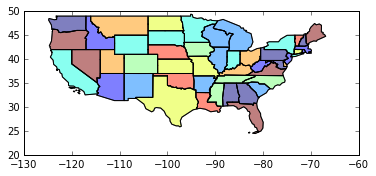

In [52]:
states_df.plot()

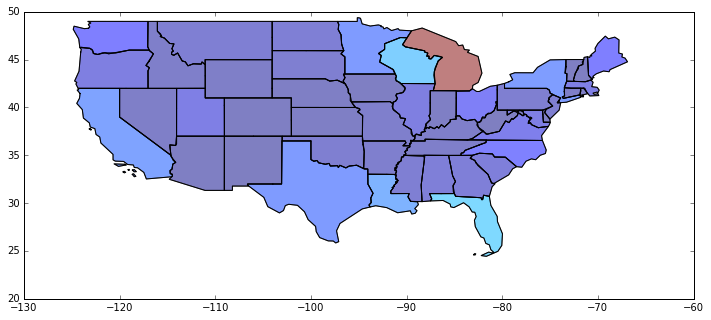

In [20]:
# May the plot larger, and color the states by the area of water in teh state.
plt.figure(figsize=(12,6))
states_df.plot(column='awater')

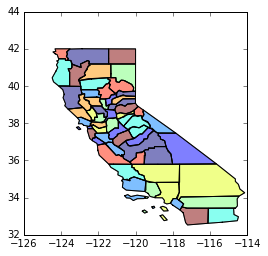

In [23]:
# Load the counties in California
counties_df = counties_p.geoframe(epsg=4239, simplify=0.05, predicate=lambda row: row.statefp == 6)
counties_df.plot()

In [ ]:
openspc_df = l.partition('cdph.ca.gov-hci-open_space-county').dataframe()

In [35]:
openspc_all = openspc_df[ (openspc_df.race_eth_name == 'Total')][['gvid','p_parkacc','pop2010', 'pop_park_acc'] ]
openspc_all.head()

,gvid,p_parkacc,pop2010,pop_park_acc
464,0O0601,0.919045,1510271,1388007
465,0O0603,0.920000,1175,1081
466,0O0605,0.334095,38091,12726
467,0O0607,0.623141,220000,137091
468,0O0609,0.357870,45578,16311


In [43]:
count_parks = counties_df.set_index('gvid').join(openspc_all.set_index('gvid'))

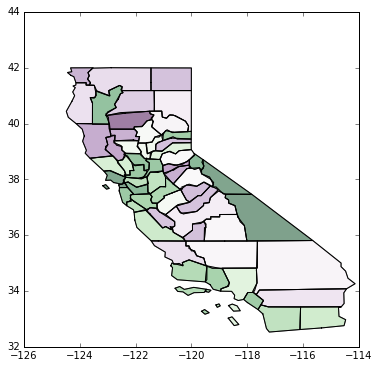

In [47]:
# Plot percentage of population with access to parks. Purple is low and green is high. 
plt.figure(figsize=(6, 12))
count_parks.plot(column='p_parkacc', colormap='PRGn')